In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from math import inf

def dijkstra_min_path(graph, source, target):
    distances = {node : inf for node in graph.nodes}
    previous = {node : None for node in graph.nodes}
    not_visited = [node for node in graph.nodes]  

    distances[source] = 0

    while not_visited:
        c_node = min(not_visited, key=distances.get)
        not_visited.remove(c_node)

        if distances[c_node] == inf:
            break

        for neighbor, weight in graph[c_node].items():
            distance = distances[c_node] + weight['weight']

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = c_node
    
    path = []
    c_node = target
    
    while c_node is not None:
        path.append(c_node)
        c_node = previous[c_node]
    
    path.reverse()
    
    return distances, previous, path

In [2]:
graph = nx.Graph()
graph.add_edge('A', 'B', weight=5)
graph.add_edge('A', 'C', weight=2)
graph.add_edge('C', 'B', weight=7)
graph.add_edge('B', 'D', weight=8)
graph.add_edge('C', 'D', weight=4)
graph.add_edge('C', 'E', weight=8)
graph.add_edge('D', 'E', weight=6)
graph.add_edge('D', 'F', weight=4)
graph.add_edge('E', 'F', weight=3)

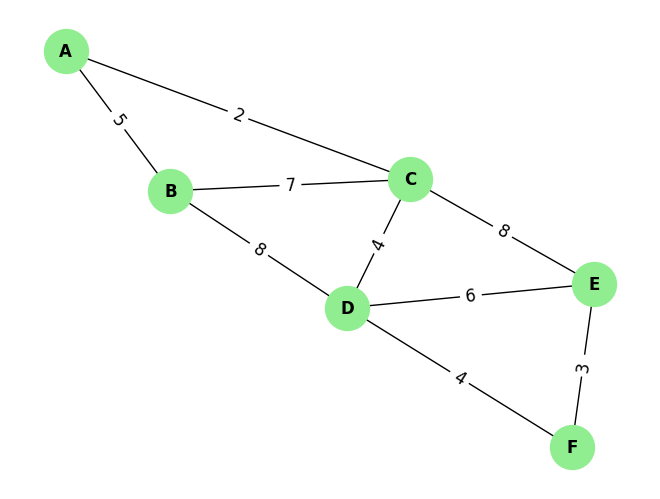

In [3]:
# Desenhando o grafo
edge_labels = nx.get_edge_attributes(graph, 'weight') # Extraindo os pesos das arestas para usar na visualização
pos = nx.spring_layout(graph)  # Layout para a posição dos nós
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=12, font_weight='bold', edge_color='black')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12)
plt.show()

In [4]:
source = 'A'
target = 'F'
distances, previous, path = dijkstra_min_path(graph, source, target)
path_edges = list(zip(path, path[1:]))

/tmp/ipykernel_12877/737481653.py:4: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)


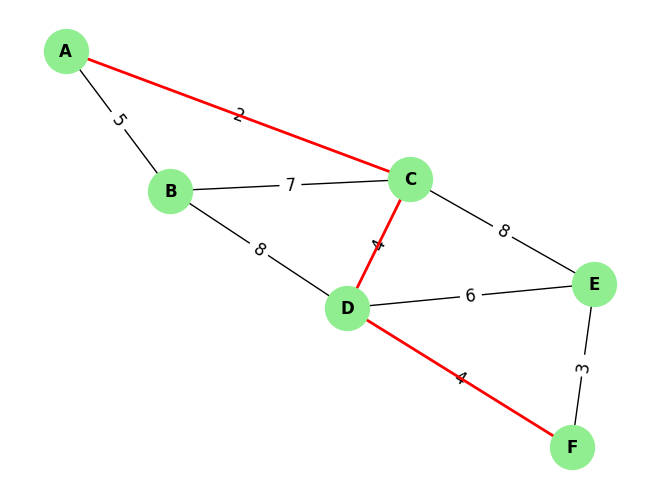

In [5]:
# Desenhando o menor caminho
nx.draw(graph, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=12, font_weight='bold', edge_color='black')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=12)
nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)